In [16]:
import numpy as np 
import tensorflow as tf 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from keras.utils import load_img, img_to_array

**Image Agumentation**

In [2]:
class image_agum():
  def __init__(self,path):
    self.path = path 
  
  def Image_gen(self):

    #image generated for training images 
    train_image_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
    
    #Images from the folder path 
    image_set = train_image_datagen.flow_from_directory(
        self.path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
    
    return image_set

In [3]:
#collecting the images for training the model 
path = "/content/drive/MyDrive/flowers"
train_image = image_agum(path).Image_gen()

Found 4317 images belonging to 5 classes.


**Deep Learning Model**

In [4]:
model = Sequential() 
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())  
model.add(Dense(64,activation='relu')) 
model.add(Dense(32,activation='relu'))  
model.add(Dense(5,activation='softmax')) 

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_image,
                    steps_per_epoch=len(train_image),
                    epochs=10)

Epoch 1/10
135/135 [==============================] - 35s 254ms/step - loss: 0.8644 - accuracy: 0.6699
Epoch 2/10
135/135 [==============================] - 34s 253ms/step - loss: 0.8197 - accuracy: 0.6908
Epoch 3/10
135/135 [==============================] - 34s 251ms/step - loss: 0.7842 - accuracy: 0.7054
Epoch 4/10
135/135 [==============================] - 34s 255ms/step - loss: 0.7607 - accuracy: 0.7102
Epoch 5/10
135/135 [==============================] - 34s 252ms/step - loss: 0.7304 - accuracy: 0.7250
Epoch 6/10
135/135 [==============================] - 34s 253ms/step - loss: 0.7039 - accuracy: 0.7389
Epoch 7/10
135/135 [==============================] - 34s 253ms/step - loss: 0.6727 - accuracy: 0.7408
Epoch 8/10
135/135 [==============================] - 35s 258ms/step - loss: 0.6606 - accuracy: 0.7577
Epoch 9/10
135/135 [==============================] - 34s 253ms/step - loss: 0.6293 - accuracy: 0.7635
Epoch 10/10
135/135 [==============================] - 34s 251ms/step - l

In [9]:
"""
- Avoided splitting the data into validation and train due to complexity 
- Traget class : 5 
- Saving the model's as .H5 file

"""

#saving the model 
model.save('model.h5')

**Loading the model and testing**

In [17]:
m = keras.models.load_model('model.h5')

img=load_img('/content/drive/MyDrive/flowers/download (2).jpg',target_size=(150,150))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 132ms/step


'daisy'

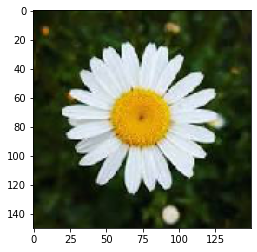

In [18]:
plt.imshow(img)

In [19]:
#predicted label is matching with the given image 